In [38]:
import pandas as pd 
import numpy as np
from scipy.stats import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r'C:/Users/guduru/Desktop/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.shape

(1000, 9)

In [8]:
df.info()#checking datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
#checking for duplicate values
dcount = len(df[df.duplicated()])
dcount

0

In [10]:
#checking for missing values
mcount=df.isna().sum() 
mcount

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [12]:
df.describe()#checking statistics of the dataset

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [13]:
mode=df.mode()#mode of the data
mode

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0
1,2,NaN,CUST002,NaN,64.0,NaN,NaN,NaN,NaN
2,3,NaN,CUST003,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,CUST004,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,CUST005,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,996,NaN,CUST995,NaN,NaN,NaN,NaN,NaN,NaN
996,997,NaN,CUST996,NaN,NaN,NaN,NaN,NaN,NaN
997,998,NaN,CUST997,NaN,NaN,NaN,NaN,NaN,NaN
998,999,NaN,CUST998,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

In [29]:
monthly_sales = df.groupby('Month')['Quantity'].sum()
daily_sales = df.groupby('DayOfWeek')['Quantity'].sum()

In [30]:
busiest_month = monthly_sales.idxmax()
busiest_day = daily_sales.idxmax()

In [31]:
print("Busiest Month (in terms of sales):", busiest_month)
print("Busiest Day of the Week (in terms of sales):", busiest_day)


Busiest Month (in terms of sales): 5
Busiest Day of the Week (in terms of sales): Tuesday


In [32]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,DayOfWeek
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,Saturday


In [34]:
#customer and product analysis
customer_demographics = df.groupby(['Customer ID', 'Gender', 'Age']).size().reset_index(name='Transaction Count')

# Summary statistics for customer age
age_summary = customer_demographics['Age'].describe()

# Gender distribution
gender_distribution = customer_demographics['Gender'].value_counts()

print("Customer Analysis:")
print("Age Summary:")
print(age_summary)
print("\nGender Distribution:")
print(gender_distribution)

Customer Analysis:
Age Summary:
count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

Gender Distribution:
Gender
Female    510
Male      490
Name: count, dtype: int64


In [35]:
product_preferences = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

# Summary statistics for quantity sold by product category
quantity_summary = product_preferences.describe()

# Average price per unit for each product category
avg_price_per_category = df.groupby('Product Category')['Price per Unit'].mean().sort_values(ascending=False)

# Summary statistics for average price per unit
avg_price_summary = avg_price_per_category.describe()

print("\nProduct Analysis:0")
print("Quantity Summary:")
print(quantity_summary)
print("\nAverage Price per Unit Summary:")
print(avg_price_summary)


Product Analysis:0
Quantity Summary:
count      3.000000
mean     838.000000
std       62.233432
min      771.000000
25%      810.000000
50%      849.000000
75%      871.500000
max      894.000000
Name: Quantity, dtype: float64

Average Price per Unit Summary:
count      3.000000
mean     180.081236
std        5.131681
min      174.287749
25%      178.094167
50%      181.900585
75%      182.977980
max      184.055375
Name: Price per Unit, dtype: float64


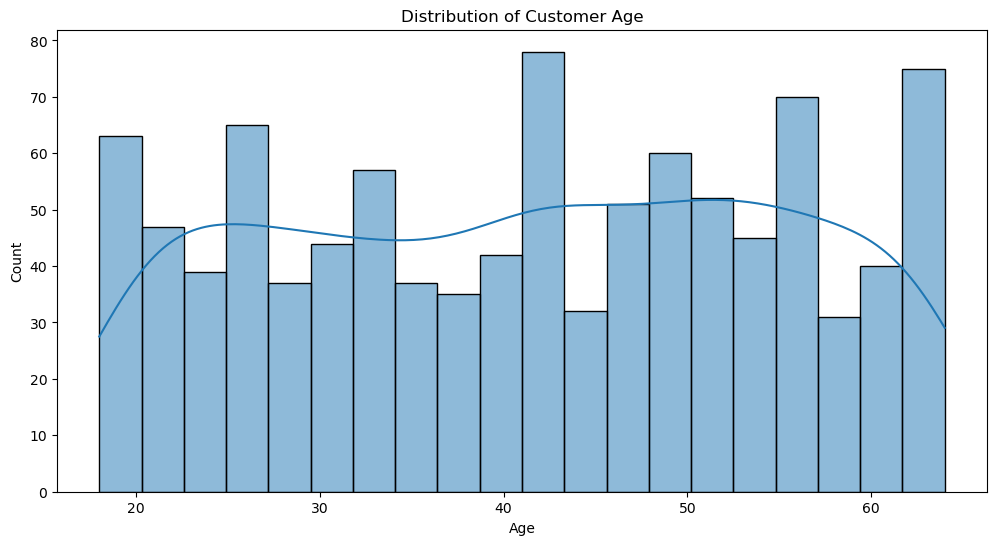

In [40]:
#visualization
customer_demographics = df.groupby(['Customer ID', 'Gender', 'Age']).size().reset_index(name='Transaction Count')

# Plot distribution of customer age
plt.figure(figsize=(12, 6))
sns.histplot(customer_demographics['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


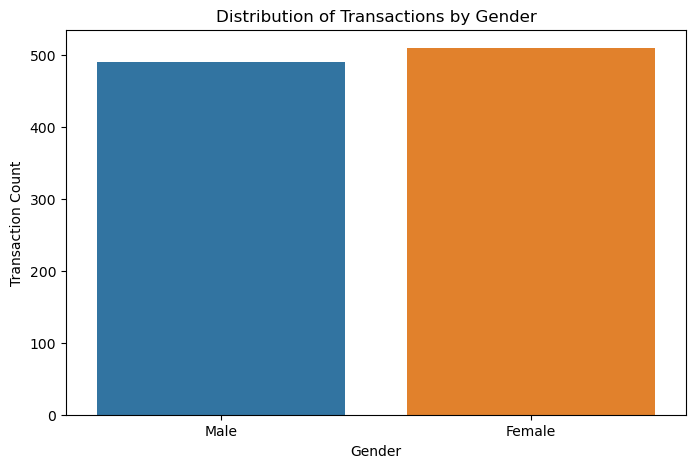

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=customer_demographics)
plt.title('Distribution of Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Count')
plt.show()


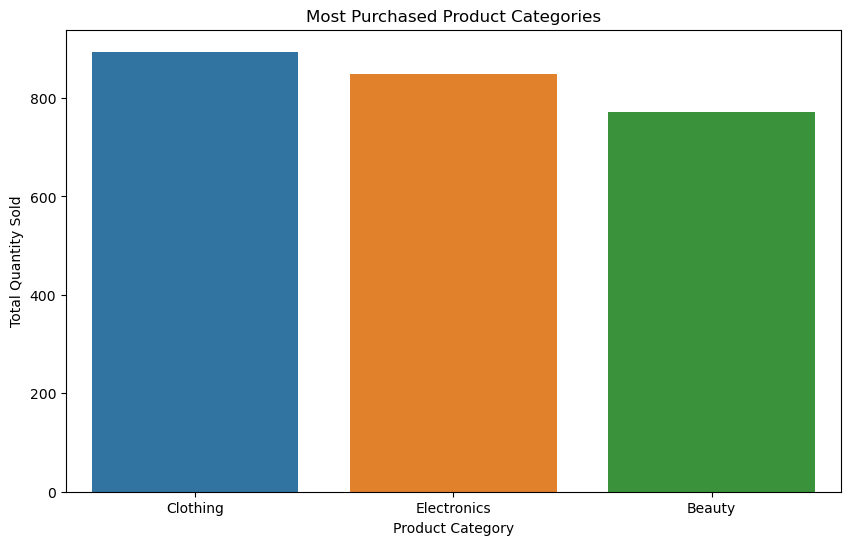

In [42]:
product_preferences = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_preferences.index, y=product_preferences.values)
plt.title('Most Purchased Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()


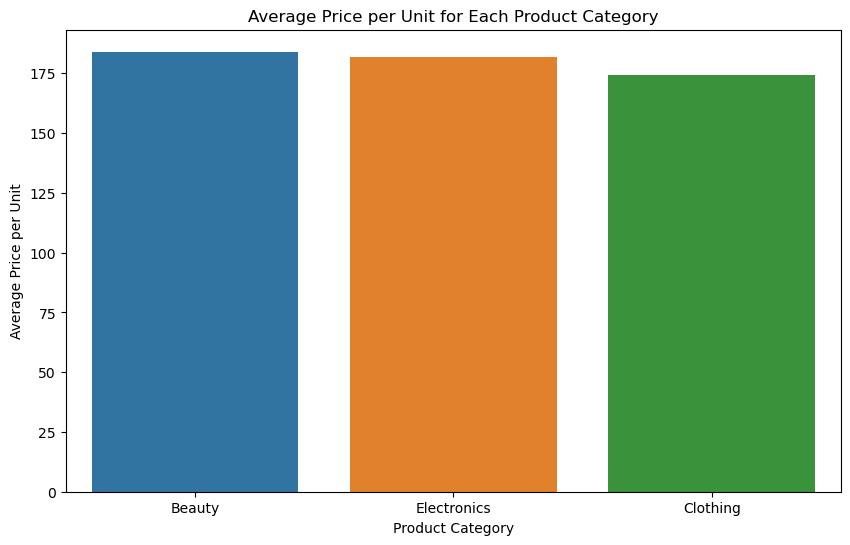

In [43]:
# Calculate average price per unit for each product category
avg_price_per_category = df.groupby('Product Category')['Price per Unit'].mean().sort_values(ascending=False)

# Plot average price per unit for each product category
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values)
plt.title('Average Price per Unit for Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price per Unit')
plt.show()

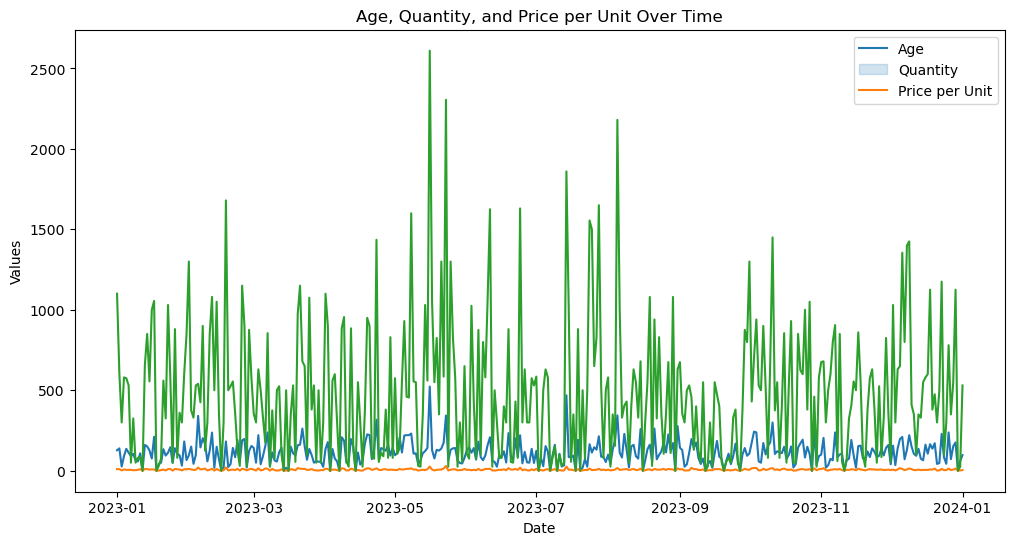

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily[['Age', 'Quantity', 'Price per Unit']], dashes=False)
plt.title('Age, Quantity, and Price per Unit Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['Age', 'Quantity', 'Price per Unit'])
plt.show()
